In [27]:
import pandas as pd
import numpy as np
import statistics 
from sklearn import linear_model
from matplotlib import pyplot as plt
import statsmodels.api as sm

df = pd.read_excel("the data for your group project_MA541.xlsx")

df.head()

,Close_ETF,oil,gold,JPM
0,97.349998,0.039242,0.004668,0.032258
1,97.750000,0.001953,-0.001366,-0.002948
2,99.160004,-0.031514,-0.007937,0.025724
3,99.650002,0.034552,0.014621,0.011819
4,99.260002,0.013619,-0.011419,0.000855


In [28]:
df.shape

(1000, 4)

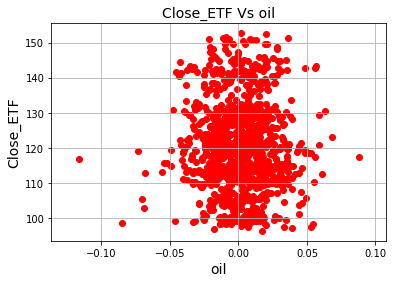

In [29]:
plt.scatter(df['oil'], df['Close_ETF'], color='red')
plt.title('Close_ETF Vs oil', fontsize=14)
plt.xlabel('oil', fontsize=14)
plt.ylabel('Close_ETF', fontsize=14)
plt.grid(True)
plt.show()

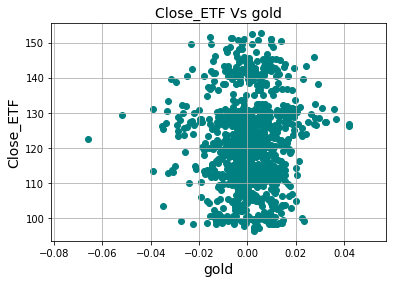

In [30]:
plt.scatter(df['gold'], df['Close_ETF'], color='teal')
plt.title('Close_ETF Vs gold', fontsize=14)
plt.xlabel('gold', fontsize=14)
plt.ylabel('Close_ETF', fontsize=14)
plt.grid(True)
plt.show()

In [31]:
df.isna().sum()

Close_ETF    0
oil          0
gold         0
JPM          0
dtype: int64

In [32]:
# Consider the data including the ETF, Gold and Oil column. Using any software, fit a multiple linear regression model to the data with 
#the ETF variable as the response
x = df[['gold','oil']]
x.shape

(1000, 2)

In [33]:
y = df['Close_ETF']
y.shape

(1000,)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(x, y)
y_predicted = regr.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

In [65]:
print('Intercept:', regr.intercept_)
print('Coefficients:', regr.coef_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Intercept: [121.1427253 121.1427253]
Coefficients: [[-9.12609977 29.62259178]
 [-9.12609977 29.62259178]]
Root mean squared error:  157.72320083995749
R2 score:  0.0007502966608662343


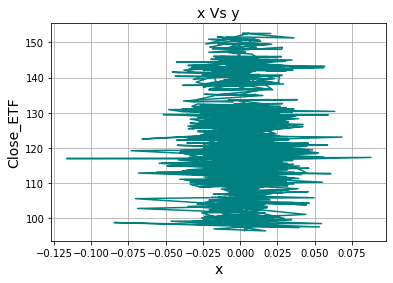

In [69]:
# predicted values
plt.plot(x, y, color='teal')
plt.title('x Vs y', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('Close_ETF', fontsize=14)
plt.grid(True)
plt.show()

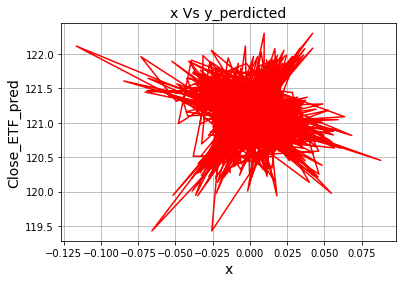

In [68]:
# predicted values
plt.plot(x, y_predicted, color='red')
plt.title('x Vs y_perdicted', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('Close_ETF_pred', fontsize=14)
plt.grid(True)
plt.show()

In [36]:
New_oil_val = 0.039242
New_gold_val = 0.004668
print ('Predicted ETF value: \n', regr.predict([[New_gold_val,New_oil_val]]))

# The model can be used for prediction

Predicted ETF value: 
 [120.92287715]


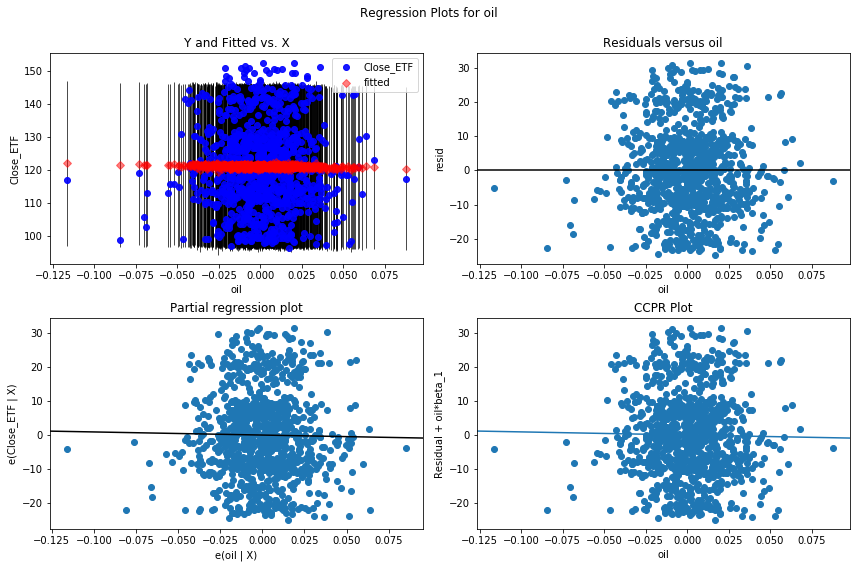

In [49]:
from statsmodels.formula.api import ols
model = ols('Close_ETF~oil+gold', data=df).fit()
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'oil', fig=fig)

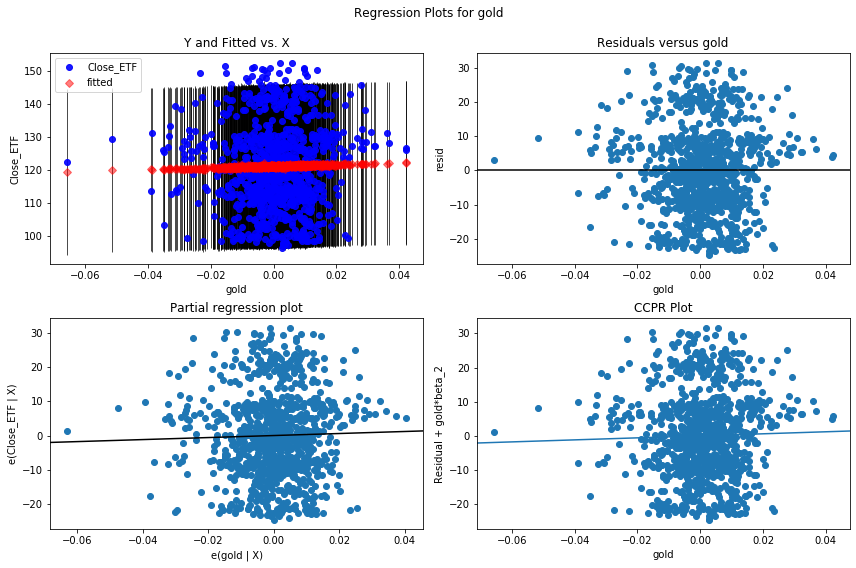

In [58]:
from statsmodels.formula.api import ols
model = ols('Close_ETF~oil+gold', data=df).fit()
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'gold', fig=fig)

In [37]:
# with statsmodels
x = sm.add_constant(x) # adding a constant

/Users/sarojakondamudi/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              Close_ETF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3743
Date:                Sun, 06 Dec 2020   Prob (F-statistic):              0.688
Time:                        15:48:12   Log-Likelihood:                -3949.4
No. Observations:                1000   AIC:                             7905.
Df Residuals:                     997   BIC:                             7919.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1427      0.399    303.856      0.0

In [39]:
X = x[['gold','oil']].to_numpy()
y_pred = np.dot(X, np.array([29.62259178, -9.12609977])) + 121.14272529601266

In [40]:
y_pred = pd.DataFrame(y_pred, columns =['Close_ETF_pred'])
y = pd.DataFrame(y, columns =['Close_ETF'])
New_b = x.join(y)
df_final = New_b.join(y_pred)
print(df_final)

     const      gold       oil   Close_ETF  Close_ETF_pred
0      1.0  0.004668  0.039242   97.349998      120.922868
1      1.0 -0.001366  0.001953   97.750000      121.084422
2      1.0 -0.007937 -0.031514   99.160004      121.195225
3      1.0  0.014621  0.034552   99.650002      121.260502
4      1.0 -0.011419  0.013619   99.260002      120.680172
..     ...       ...       ...         ...             ...
995    1.0  0.004634  0.009752  150.570007      121.190990
996    1.0 -0.015325 -0.009341  151.600006      120.774006
997    1.0 -0.006195  0.036120  151.300003      120.629576
998    1.0  0.005778  0.001542  152.619995      121.299799
999    1.0  0.001965  0.020330  152.539993      121.015411

[1000 rows x 5 columns]


In [41]:
df_final['mse'] = df_final['Close_ETF']-df_final['Close_ETF_pred']
print(df_final)

     const      gold       oil   Close_ETF  Close_ETF_pred        mse
0      1.0  0.004668  0.039242   97.349998      120.922868 -23.572870
1      1.0 -0.001366  0.001953   97.750000      121.084422 -23.334422
2      1.0 -0.007937 -0.031514   99.160004      121.195225 -22.035221
3      1.0  0.014621  0.034552   99.650002      121.260502 -21.610500
4      1.0 -0.011419  0.013619   99.260002      120.680172 -21.420170
..     ...       ...       ...         ...             ...        ...
995    1.0  0.004634  0.009752  150.570007      121.190990  29.379017
996    1.0 -0.015325 -0.009341  151.600006      120.774006  30.826000
997    1.0 -0.006195  0.036120  151.300003      120.629576  30.670427
998    1.0  0.005778  0.001542  152.619995      121.299799  31.320196
999    1.0  0.001965  0.020330  152.539993      121.015411  31.524582

[1000 rows x 6 columns]


In [42]:
from sklearn.metrics import r2_score   
r_square = r2_score(df_final['Close_ETF'], df_final['Close_ETF_pred'])  
print("The R-Square score is:" ,r_square)
n= len(df_final)
k = 2
adjusted_r_square = 1-(((1-r_square)*(n-1))/(n-k-1))
print("The Adjusted R-Square score is:" ,adjusted_r_square)

The R-Square score is: 0.0007502966608660122
The Adjusted R-Square score is: -0.0012542162846487237


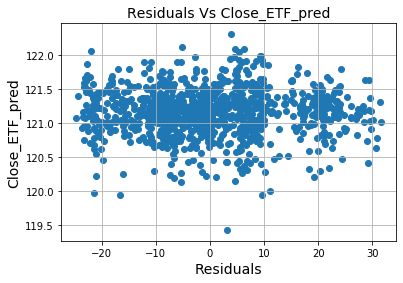

In [61]:
plt.scatter(df_final['mse'],df_final['Close_ETF_pred'])
plt.title('Residuals Vs Close_ETF_pred', fontsize=14)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Close_ETF_pred', fontsize=14)
plt.grid(True)
plt.show()
plt.show()
